In [1]:
%matplotlib widget
import time
import numpy as np
import pandas
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter

keys = [
    "`1234567890-= ",
    " qwertyuiop[]\\",
    " asdfghjkl;'  ",
    " zxcvbnm,./   ",
]
keys_caps = [
    "~!@#$%^&*()_+ ",
    " QWERTYUIOP{}|",
    ' ASDFGHJKL:"  ',
    " ZXCVBNM<>?   ",
]

def get_position(keys, keys_caps, c):
    for i in range(len(keys)):
        for j in range(len(keys[i])):
            if c == keys[i][j] or c == keys_caps[i][j]:
                return i, j
    return -1, -1
    
def get_password_distance(password):
    distances = ''

    for i in range(len(password)):
        y, x = get_position(keys, keys_caps, password[i])
        if i >= 1:
            xd = abs(x - lx)
            yd = abs(y - ly)
            distance = xd + yd
            if i == 1:
                distances += '%d' % (distance)
            else:
                distances += ',%d' % (distance)
                
        lx = x
        ly = y
    return distances
    
def generate_password_keyboard(password, filename, title=None):
    base = np.ones((len(keys), len(keys[0]), 3), dtype=int)
    data = base * 255

    def draw_keyboard(ax, data):
        im = ax.imshow(data, alpha=.9, extent=(0,len(keys[0]),0,len(keys)))
        ax.tick_params(bottom=False, left=False)
        ax.set_xticks(np.arange(len(keys[0])))
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.grid(color='k', linestyle='-', lw=1)
        for j in range(len(data)):
            for i in range(len(data[j])):
                if keys_caps[j][i].isalpha():
                    im.axes.text(i +.5, 3 - j + .5, keys_caps[j][i], ha='center', va='center')
                else:
                    im.axes.text(i +.5, 3 - j + .7, keys_caps[j][i], ha='center', va='center')
                    im.axes.text(i +.5, 3 - j + .25, keys[j][i], ha='center', va='center')
        return im

    # TODO: find out why the else: clause below changes the scope of the data variable
    def update2(frame):
        nonlocal data
        if frame < len(password):
            y, x = get_position(keys, keys_caps, password[frame])
            #data = base * 255
            data[y][x] = (255, 150 - frame * 5, 150 - frame * 5)
            im.set_data(data)
        else:
            data = base * 255
            im.set_data(data)

    fig, ax = plt.subplots(figsize=(5.5,2.5))
    ax.autoscale_view('tight')
    ax.set_title(title)
    im = draw_keyboard(ax, data)
    
    ani = animation.FuncAnimation(fig, update2, repeat=False, frames=len(password) + 1, interval=333)
    ani.save(filename, dpi=100, writer=PillowWriter())
    plt.close()


In [2]:
passwords = [
    'qwer1234QWER!@#$',
    '1qaz2wsx#EDC$RFV',
    '1q2w3e4r!Q@W#E$R',
    'zvafqr14ZVAFQR!$',
    'zxcvasdfqwer1234',
    'dDfFrReE3#4$',
    'qwer4321QWER$#@!',
]

i = 0
for p in passwords:
    distances = get_password_distance(p)
    generate_password_keyboard(p, '%s.gif' % (distances.replace(',', '')), title='Password: %s\nDistance: %s' % (p, distances))
    i += 1

keypass = [
'MFLJ9YSezu',
'3wdSCzqWXV',
'XCU5dKJWC4',
'Z3DZmRYMEc',
'U3FznbVezNm',
'SeNjRuW37HF',
'XrHVirS399j',
'LafrHsReA3o',
'sV47E9DH7oN',
'bn92eRghzYN',
'JPkqLmV9cAs',
'y3SrfZvS4D4',
'2cskWzFEowx',
'7hfhnxesFXwrK',
'4WVRzMLYneoT2',
'cMD3fj5RmUrC4w',
'WVVM73c5TnChdM',
'5iivD2yPPNgEiNhz',
'MFiR7pty2fMortLMW',
]

i = 0
for p in keypass:
    distances = get_password_distance(p)
    generate_password_keyboard(p, 'keypass_%d.gif' % (i), title='Password: %s\nDistance: %s' % (p, distances))
    i += 1


common_passwords = [
    'qwerty',
    'qwertyuiop',
    '1qaz2wsx',
    'qazwsx',
    'asdfgh',
    'zxcvbnm',
    '1234qwer',
    'q1w2e3r4t5',
    'qwer1234',
    'q1w2e3r4',
    'asdfasdf',
    'qazwsxedc',
    'asdfghjkl',
    'q1w2e3',
    '1qaz2wsx',
    '12QWaszx',
    'qweasdzxc',
    'mnbvcxz',
    'a1b2c3d4',
    'adgjmptw'
]

i = 0
for p in common_passwords:
    distances = get_password_distance(p)
    generate_password_keyboard(p, 'common_%d.gif' % (i), title='Password: %s\nDistance: %s' % (p, distances))
    i += 1    

In [3]:
# generate single image example
p = '13qeadzc!#QEADZC'
distances = get_password_distance(p)
generate_password_keyboard(p, 'seq-example.gif', title='Password: %s\nDistance: %s' % (p, distances))


In [4]:
%matplotlib widget
import time
import numpy as np
import pandas
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter

def highlight_password_keyboard(password, filename, title=None):
    if not title:
        title = 'Password: %s' % (password)
    keys = [
        "`1234567890-= ",
        " qwertyuiop[]\\",
        " asdfghjkl;'  ",
        " zxcvbnm,./   ",
    ]
    keys_caps = [
        "~!@#$%^&*()_+ ",
        " QWERTYUIOP{}|",
        ' ASDFGHJKL:"  ',
        " ZXCVBNM<>?   ",
    ]
    
    base = np.ones((len(keys), len(keys[0]), 3), dtype=int)
    data = base * 255

    def get_position(keys, keys_caps, c):
        for i in range(len(keys)):
            for j in range(len(keys[i])):
                if c == keys[i][j] or c == keys_caps[i][j]:
                    return i, j
        return -1, -1
    
    def draw_keyboard(ax, data):
        im = ax.imshow(data, alpha=.9, extent=(0,len(keys[0]),0,len(keys)))
        ax.tick_params(bottom=False, left=False)
        ax.set_xticks(np.arange(len(keys[0])))
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.grid(color='k', linestyle='-', lw=1)
        for j in range(len(data)):
            for i in range(len(data[j])):
                if keys_caps[j][i].isalpha():
                    im.axes.text(i +.5, 3 - j + .5, keys_caps[j][i], ha='center', va='center')
                else:
                    im.axes.text(i +.5, 3 - j + .7, keys_caps[j][i], ha='center', va='center')
                    im.axes.text(i +.5, 3 - j + .25, keys[j][i], ha='center', va='center')
        return im

    # TODO: find out why the else: clause below changes the scope of the data variable
    def update2(frame):
        nonlocal data
        if frame < len(password):
            y, x = get_position(keys, keys_caps, password[frame])
            #data = base * 255
            data[y][x] = (255, 150 - frame * 5, 150 - frame * 5)
            im.set_data(data)
        else:
            data = base * 255
            im.set_data(data)

    fig, ax = plt.subplots(figsize=(6,2))
    ax.autoscale_view('tight')
    ax.set_title(title)
    im = draw_keyboard(ax, data)
    for c in password:
        y, x = get_position(keys, keys_caps, c)
        data[y][x] = (255, 0, 0)
    im.set_data(data)
    fig.savefig(filename)
    plt.show()

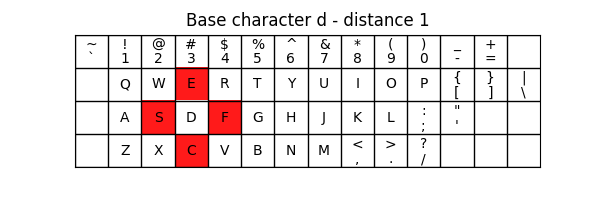

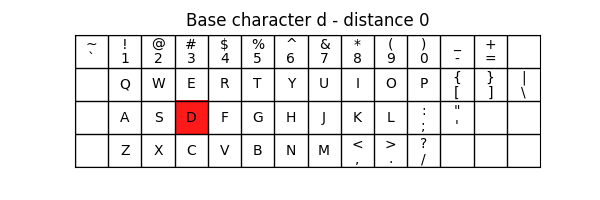

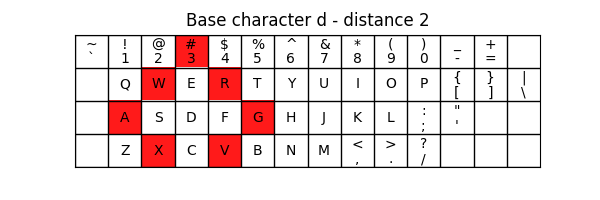

In [5]:
highlight_password_keyboard('escf', 'images/base-d-w1.jpg', title='Base character d - distance 1')
highlight_password_keyboard('d', 'images/base-d-w0.jpg', title='Base character d - distance 0')
highlight_password_keyboard('agxvwr3', 'images/base-d-w2.jpg', title='Base character d - distance 2')